In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pacological.lif import gain
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed
from pacological.lif import exp, gain
from convenience.numpy import save_hdfz, load_hdfz

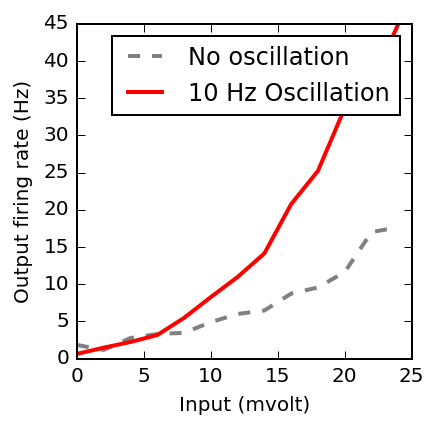

In [64]:
# -----------------------------------------------------------------------------------
# FI with fixed background
dat = load_hdfz('../data/exp226/versus.hdf5')

rates = dat['rates']
Is = dat['Is']
gs = dat['gs']
vs = dat['vs']
vs_sd = dat['vs_sd']

# -----------------------------------------------

plt.figure(figsize=(3, 3))
plt.plot(Is, rates[:,0], label='No oscillation', color='grey', linestyle='--', linewidth=2)
plt.plot(Is, rates[:,2], label='10 Hz Oscillation', color='r', linewidth=2)
plt.xlabel("Input (mvolt)")
plt.ylabel("Output firing rate (Hz)")
plt.legend(loc='best')

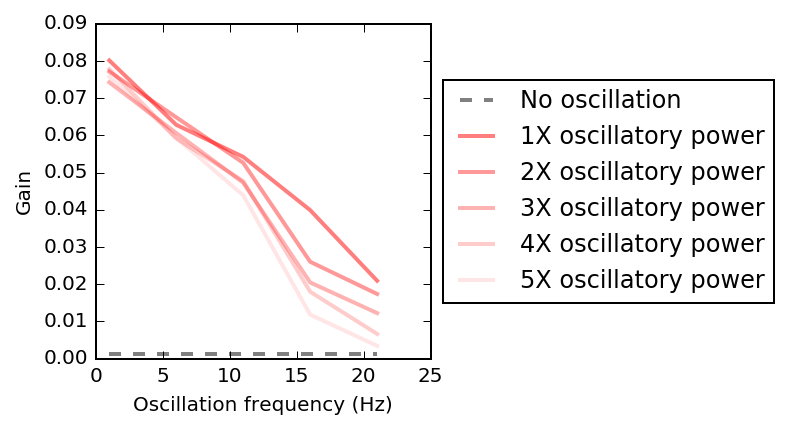

In [63]:
freqs = range(1, 45, 5)
xfactors = np.arange(5, 10, 1)

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp208/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is, rates[:, j], 2)
        gains[i, j] = fitted[0]

# --
# Plot
plt.figure(figsize=(3,3))

# 1X
plt.plot(
    freqs[0:5], gains[0:5, 0], 
    label='No oscillation'.format(xfactors[0]), 
    color='grey', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X factor
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs[0:5], gains[0:5, j + 1], 
        label='{}X oscillatory power'.format(xf-4), 
        color='r', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation frequency (Hz)")
plt.ylabel("Gain")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [53]:
freqs

[1, 6, 11, 16, 21, 26, 31, 36, 41]